In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Linear Regression

We are trying to get a 3D model of the slope, intercept, and its likelihood in modeling the data provided. To do this approach we will use the following equation...

$$p(y|X, w) = \prod_{i=1}^n{\frac{1}{\sqrt{2\pi}\sigma_n}\exp\big[-\frac{(y_i-x_i^Tw)^2}{2\sigma_n^2}\big]}$$

This will give us the probability of how accurately one slope and one intercept will model the data. We can try multiple random weights to get a distribution.

Below we begin by manipulating the data and preparing it for modeling.

In [22]:
df = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot: xlabel='TV', ylabel='Sales'>

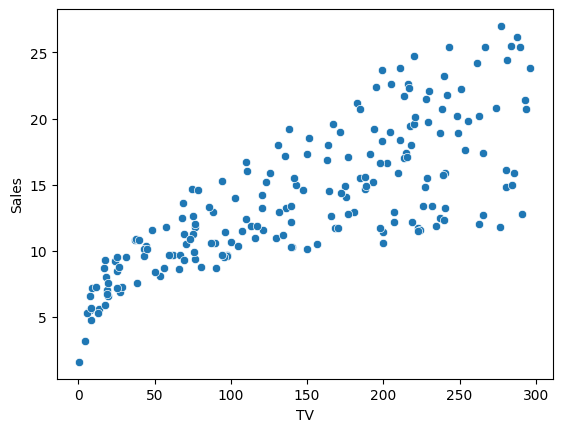

In [23]:
sns.scatterplot(x=df.TV, y=df.Sales)

In [24]:
# Obtains independent and dependent vectors
x = df.TV.to_numpy()
y = df.Sales.to_numpy()
x[0:5], y[0:5]

(array([230.1,  44.5,  17.2, 151.5, 180.8]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

In [25]:
# Scales vectors
x = x / x.mean()
y = y / y.mean()
x[0:5], y[0:5]

(array([1.5648537 , 0.30263359, 0.11697298, 1.03031436, 1.22957648]),
 array([1.57603851, 0.74166518, 0.66321983, 1.31930825, 0.91995008]))

<AxesSubplot: >

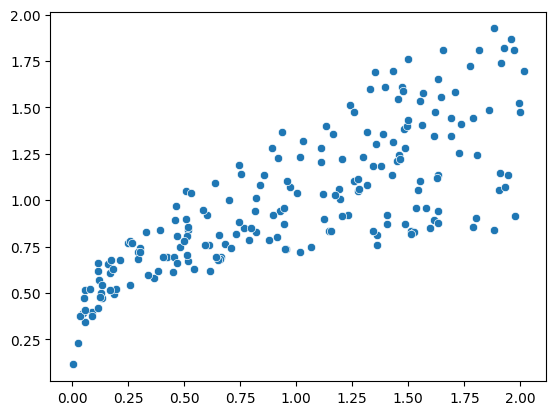

In [26]:
sns.scatterplot(x=x, y=y)

### Helper Functions
These functions will help us calculate the likelihood of a random weight

In [27]:
# Likelihood of one point
def like_point(x_i, y_i, w0, w1, noise_std=1):
    scale = 1 / (math.sqrt(2 * math.pi) * noise_std)
    return scale * math.exp(-((y_i - np.matmul([1, x_i], [w0, w1])) ** 2) / (2 * noise_std ** 2))

In [28]:
# Product of all the points
def likelihood(x=x, y=y, w0=0, w1=0, noise_std=1):
    prob_points = np.vectorize(like_point)(x, y, w0, w1, noise_std=noise_std)
    return np.prod(prob_points)

In [29]:
# Random weights used and calculated with
w = np.random.normal(0, 1, size=(1000, 2))
likely = np.vectorize(likelihood)(w0=w[:,0], w1=w[:,1])
likely

array([2.05238902e-198, 1.45929159e-154, 1.28103633e-120, 1.46406395e-126,
       2.05981609e-103, 3.61265686e-276, 3.33664896e-092, 4.97631037e-121,
       5.45259938e-093, 1.62414136e-102, 1.74889322e-096, 1.29504327e-223,
       4.87596263e-144, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.56176109e-189, 8.17006276e-184, 3.66279889e-245, 2.98461406e-121,
       8.55204374e-268, 0.00000000e+000, 4.19993503e-294, 1.27723994e-233,
       1.42659105e-203, 2.37331027e-088, 1.10436176e-257, 5.90198661e-168,
       3.55630492e-246, 1.37807980e-085, 1.75856725e-173, 1.67133901e-086,
       6.68509163e-095, 0.00000000e+000, 8.16068375e-117, 3.25827867e-083,
       3.62898190e-093, 2.20267938e-085, 4.43515332e-127, 4.49795358e-171,
       1.43882405e-093, 1.28960581e-096, 7.31739670e-248, 1.45241799e-228,
       1.00694693e-221, 4.51701494e-086, 2.57281397e-161, 4.13453810e-097,
       1.04122750e-129, 1.07020591e-132, 9.05617693e-086, 1.03359043e-084,
       0.00000000e+000, 2

In [30]:
# Converts results to data frames
res = pd.DataFrame([w[:,0], w[:,1], likely]).transpose()
res.columns = ['w0', 'w1', 'likelihood']
res

,w0,w1,likelihood
0,0.680399,-1.042445,2.052389e-198
1,-0.643261,0.360904,1.459292e-154
2,1.046253,-0.678333,1.281036e-120
3,1.379754,-0.935379,1.464064e-126
4,-0.075192,0.390266,2.059816e-103
...,...,...,...
995,0.501982,0.789220,8.552067e-88
996,-1.021271,0.275159,5.164734e-216
997,0.715875,-1.041523,4.004027e-194
998,-0.677752,-0.228355,1.940703e-248


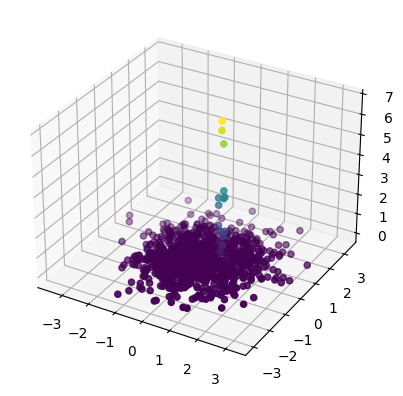

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(res.w0, res.w1, res.likelihood, c=res.likelihood, cmap='viridis')

In [32]:
res[res.likelihood == max(res.likelihood)]

,w0,w1,likelihood
119,0.518607,0.462813,6.704561e-83


In [33]:
model = LinearRegression()
model.fit(df.TV.values.reshape(-1, 1), df.Sales.values.reshape(-1, 1))
model.coef_

array([[0.04753664]])

In [34]:
model.intercept_

array([7.03259355])

In [35]:
model_scaled = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
model.coef_

array([[0.49847791]])

In [36]:
model.intercept_

array([0.50152209])